# Esse documento foi feito pra testar diferentes tratamentos de dados com FFT em respiração 


## Exemplo amigável

In [1]:
import importlib
import aux
import matplotlib.pyplot as plt
import numpy as np
import scipy
from scipy.signal import welch, butter, filtfilt
importlib.reload(aux)

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<module 'aux' from '/home/oestefal/Desktop/paradas_almir/respiratory_data_threatment/aux.py'>

Filtered frequencies: [ 5.   5.2  5.4  5.6  5.8  6.   6.2  6.4  6.6  6.8  7.   7.2  7.4  7.6
  7.8  8.   8.2  8.4  8.6  8.8  9.   9.2  9.4  9.6  9.8 10.  10.2 10.4
 10.6 10.8 11.  11.2 11.4 11.6 11.8 12.  12.2 12.4 12.6 12.8 13.  13.2
 13.4 13.6 13.8 14.  14.2 14.4 14.6 14.8 15.  15.2 15.4 15.6 15.8 16.
 16.2 16.4 16.6 16.8 17.  17.2 17.4 17.6 17.8 18.  18.2 18.4 18.6 18.8
 19.  19.2 19.4 19.6 19.8 20.  20.2 20.4 20.6 20.8 21.  21.2 21.4 21.6
 21.8 22.  22.2 22.4 22.6 22.8 23.  23.2 23.4 23.6 23.8 24.  24.2 24.4
 24.6 24.8 25.  25.2 25.4 25.6 25.8 26.  26.2 26.4 26.6 26.8 27.  27.2
 27.4 27.6 27.8 28.  28.2 28.4 28.6 28.8 29.  29.2 29.4 29.6 29.8 30. ]


/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


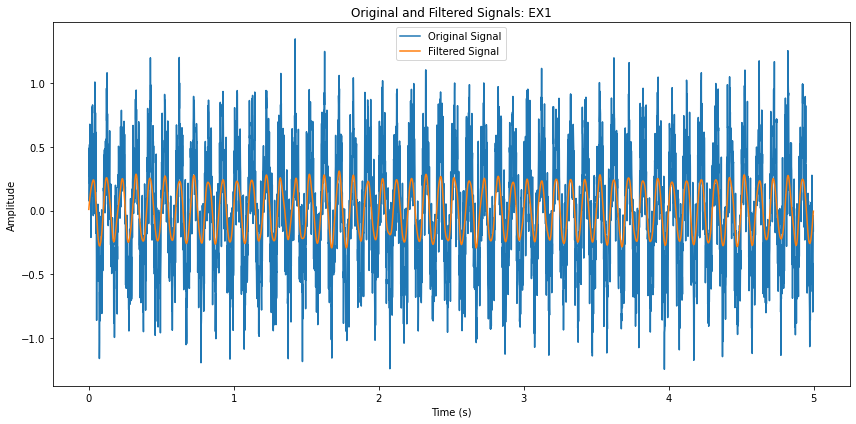

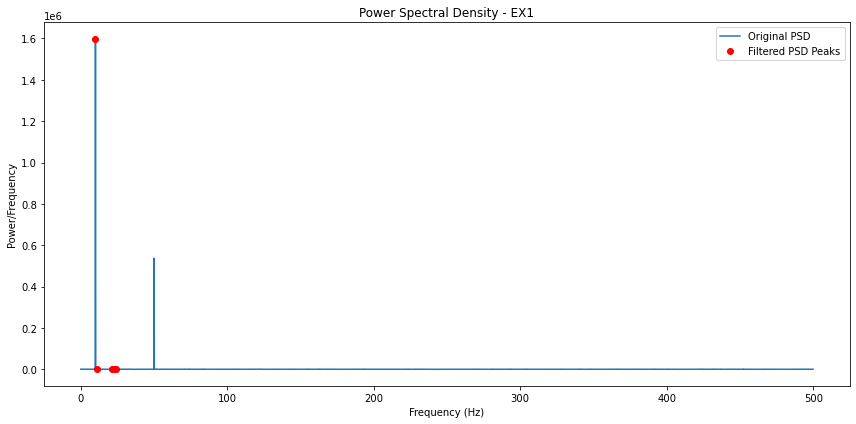

freq:  23.400000000000002 - psd:  680.1291919620766
freq:  21.200000000000003 - psd:  712.3662585978077
freq:  24.0 - psd:  779.4140899986062
freq:  11.200000000000001 - psd:  802.7891341768726
freq:  10.0 - psd:  1597891.8798989567


In [2]:
# Example usage:
# Generate a sample signal (sine wave with noise)
fs = 1000  # Sampling frequency
t = np.arange(0, 5, 1/fs)  # Time vector from 0 to 5 seconds
f1, f2 = 10, 50  # Frequencies of the sine waves
signal = 0.5 * np.sin(2 * np.pi * f1 * t) + 0.3 * np.sin(2 * np.pi * f2 * t)
noise = 0.2 * np.random.randn(len(t))  # Gaussian noise
noisy_signal = signal + noise

# Define the band mask and the number of most significant frequencies to keep
band_mask = (5, 30)  # Keep frequencies between 5 Hz and 30 Hz
n_most_significant = 5

# Process the signal
filtered_signal, filtered_frequencies, filtered_psd, filtered_fft, new_values = aux.filter_frequencies(noisy_signal, fs, band_mask, n_most_significant)

# Plot the results
freqs = np.fft.fftfreq(len(noisy_signal), 1/fs)
psd = np.abs(np.fft.fft(noisy_signal)) ** 2


#aux.plot_results(noisy_signal, filtered_signal, freqs, psd, filtered_frequencies, filtered_psd, fs = fs)

aux.plot_signals(noisy_signal, filtered_signal, fs = fs, label = "EX1")
aux.plot_spectral_densities(freqs, psd, filtered_frequencies, filtered_psd, fs = fs, label = "EX1")

for i in range(n_most_significant):
    print("freq: ", filtered_frequencies[i], "- psd: ", filtered_psd[i])

## Agora com dados de verdade

In [45]:
import pandas as pd
data = pd.read_csv('samples.csv', header = None)
data = data.rename(columns={0: 'time_stamp', 1: 'value'})
data.head()


/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


,time_stamp,value
0,1706549552251,6451.349112
1,1706549552378,6630.000000
2,1706549552506,6570.022189
3,1706549552633,6630.000000
4,1706549552760,6354.102071


In [48]:
import importlib
import aux
import matplotlib.pyplot as plt
import numpy as np
import scipy
from scipy.signal import welch, butter, filtfilt
importlib.reload(aux)

<module 'aux' from '/home/oestefal/Desktop/paradas_almir/respiratory_data_threatment/aux.py'>

Filtered frequencies: [0.13369431 0.20054146 0.26738862 0.33423577 0.40108292 0.46793008
 0.53477723 0.60162439 0.66847154 0.73531869 0.80216585 0.869013
 0.93586016]


/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


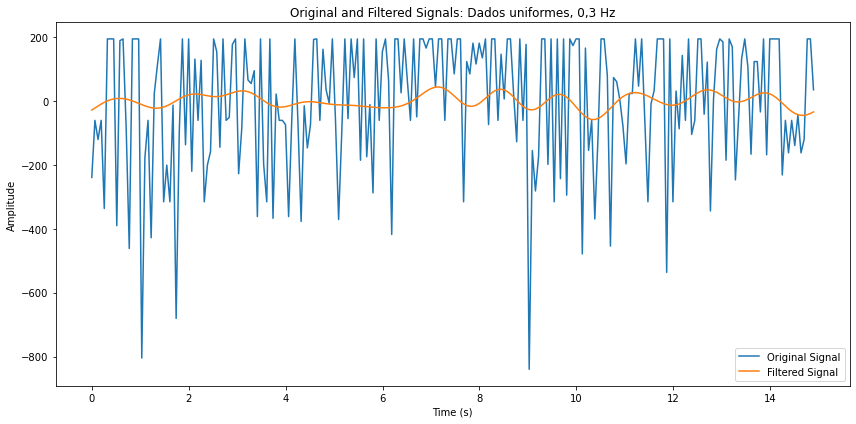

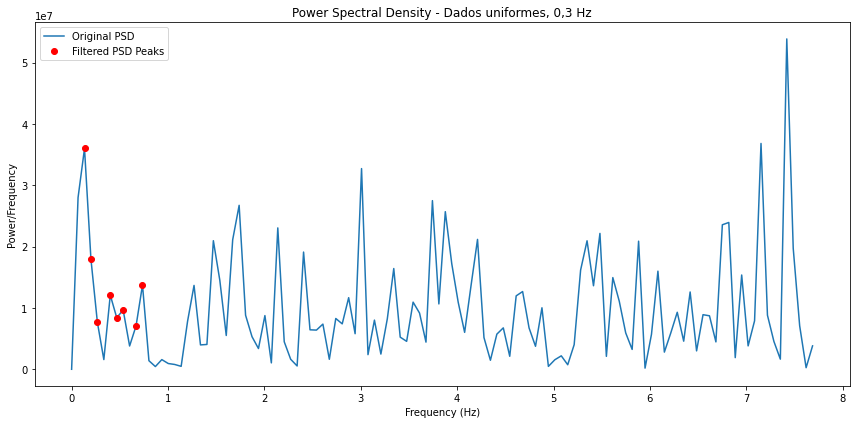

freq:  0.668471539824192 - psd:  7067681.395354001
freq:  0.26738861592967683 - psd:  7646542.290261485
freq:  0.46793007787693447 - psd:  8411671.630184075
freq:  0.5347772318593537 - psd:  9659666.63780573
freq:  0.4010829238945153 - psd:  12095578.170162437
freq:  0.7353186938066113 - psd:  13740052.85381712
freq:  0.20054146194725764 - psd:  17931238.9349719
freq:  0.13369430796483842 - psd:  35999246.54914466


In [49]:
duration = (data["time_stamp"].to_list()[-1] - data["time_stamp"].to_list()[0])
fs = data.size/29.919 # Sampling frequency

f1, f2 = 10, 50  # Frequencies of the sine waves

noisy_signal = data["value"].to_list()
noisy_signal = noisy_signal - np.mean(noisy_signal)

# Define the band mask and the number of most significant frequencies to keep
band_mask = (0.1, 1)  # Keep frequencies between 5 Hz and 30 Hz
n_most_significant = 8

# Process the signal
filtered_signal, filtered_frequencies, filtered_psd, filtered_fft, new_values = aux.filter_frequencies(noisy_signal, fs, band_mask, n_most_significant)

# Plot the results
freqs = np.fft.fftfreq(len(noisy_signal), 1/fs)
psd = np.abs(np.fft.fft(noisy_signal)) ** 2
aux.plot_signals(noisy_signal, filtered_signal, fs = fs, label = "Dados uniformes, 0,3 Hz")
aux.plot_spectral_densities(freqs, psd, filtered_frequencies, filtered_psd, fs = fs, label = "Dados uniformes, 0,3 Hz")

for i in range(n_most_significant):
    print("freq: ", filtered_frequencies[i], "- psd: ", filtered_psd[i])

/usr/lib/python3/dist-packages/scipy/signal/_peak_finding.py:261: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)
/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


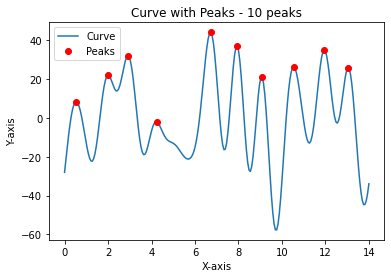

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

aux.finding_peaks(filtered_signal, fs = fs)


In [7]:
type(int(filtered_signal.size))

<class 'int'>

## Estimação de frequência de um instante

/home/oestefal/.sage/local/lib/python3.10/site-packages/PyEMD/EMD.py:768: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  dtype = np.find_common_type([x.dtype, y.dtype], [])


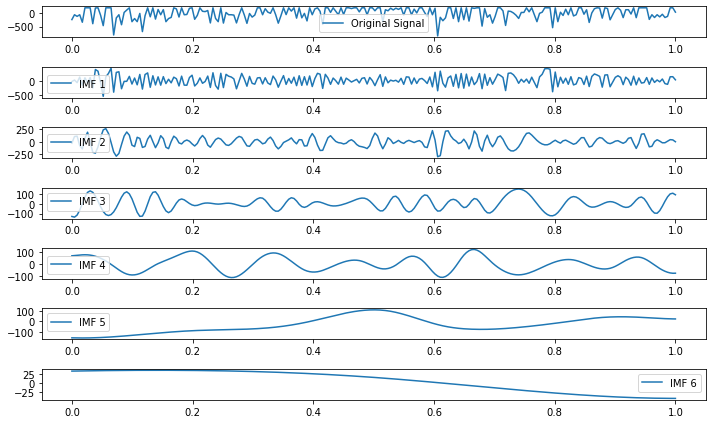

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from PyEMD import EMD

# Generate a non-stationary signal
t = np.linspace(0, 1, 232)
## signal = np.sin(2 * np.pi * 5 * t) + np.sin(2 * np.pi * 20 * t) + np.random.normal(0, 0.2, size=len(t))

# Perform Empirical Mode Decomposition
emd = EMD()
imfs = emd(noisy_signal)

# Plot the original signal and the IMFs
plt.figure(figsize=(10, 6))

plt.subplot(len(imfs) + 1, 1, 1)
plt.plot(t, noisy_signal, label='Original Signal')
plt.legend()

for i, imf in enumerate(imfs):
    plt.subplot(len(imfs) + 1, 1, i + 2)
    plt.plot(t, imf, label=f'IMF {i + 1}')
    plt.legend()

plt.tight_layout()
plt.show()

/home/oestefal/.sage/local/lib/python3.10/site-packages/PyEMD/EMD.py:768: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  dtype = np.find_common_type([x.dtype, y.dtype], [])


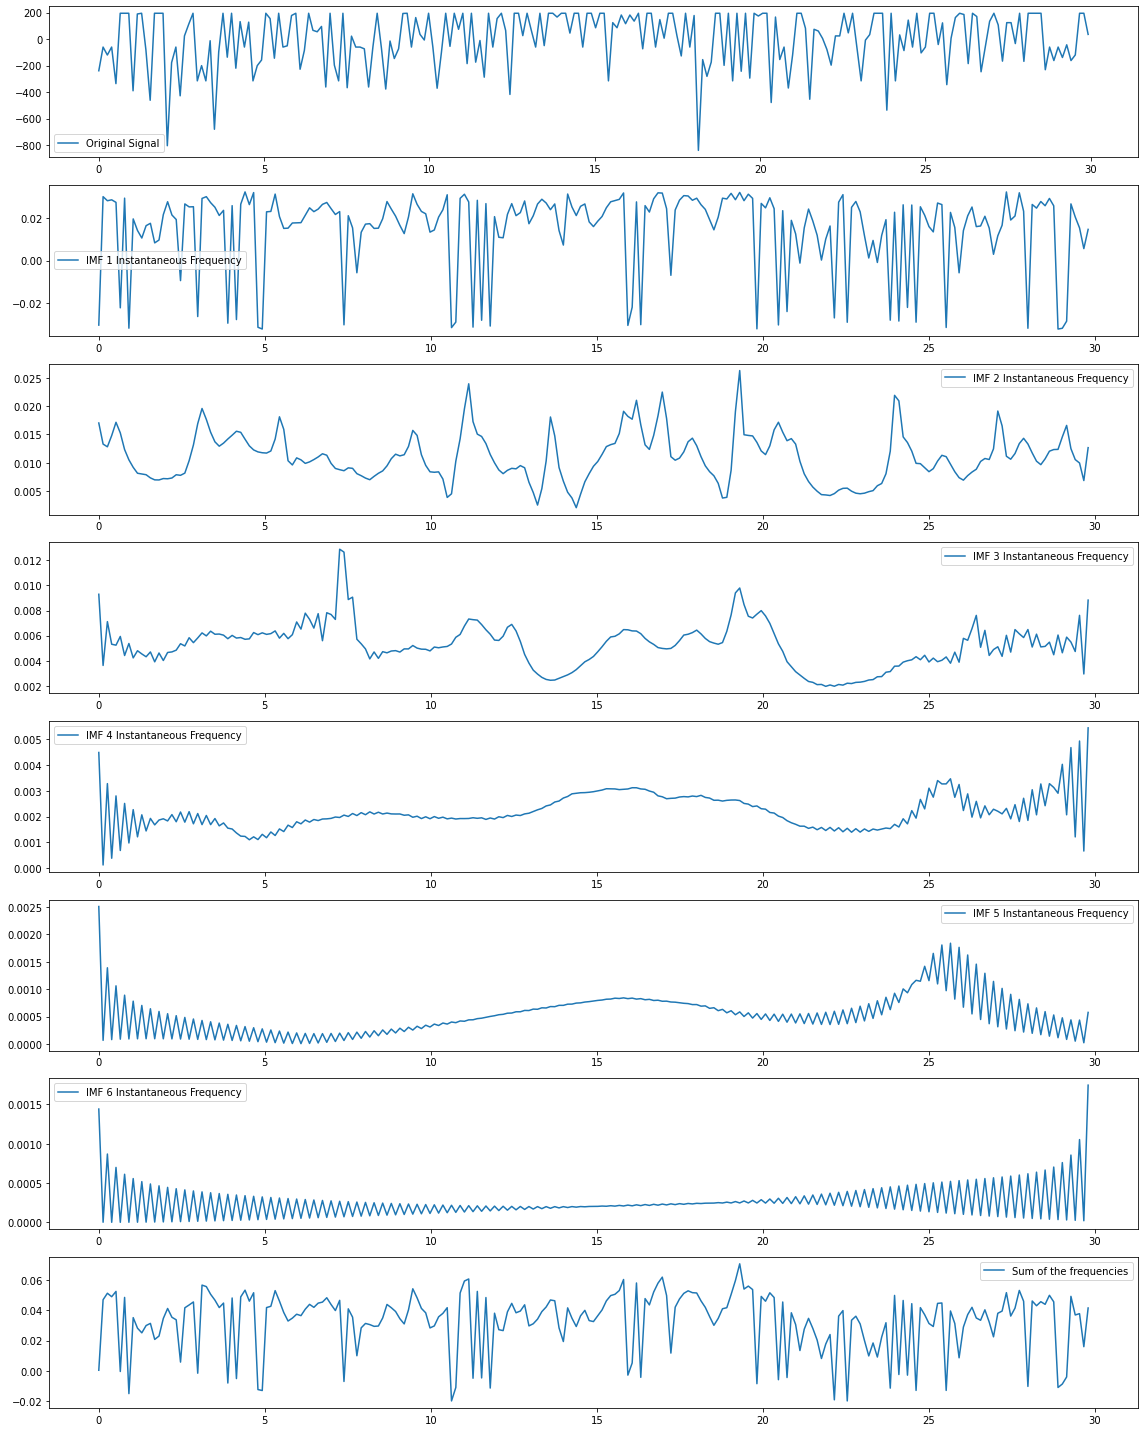

In [9]:
import numpy as np
from PyEMD import EMD
from scipy.signal import hilbert

def instantaneous_frequency_estimation(signal, sampling_rate):
    # Perform Empirical Mode Decomposition
    emd = EMD()
    imfs = emd(signal)

    # Initialize array for instantaneous frequencies
    instantaneous_frequencies = []

    for imf in imfs:
        # Compute the Hilbert transform
        analytic_signal = hilbert(imf)
        instantaneous_phase = np.unwrap(np.angle(analytic_signal))

        # Compute instantaneous frequency as the time derivative of instantaneous phase
        instantaneous_frequency = np.diff(instantaneous_phase) / (2 * np.pi / sampling_rate)

        # Append instantaneous frequency to the result
        instantaneous_frequencies.append(instantaneous_frequency)

    return instantaneous_frequencies

t = np.linspace(0, 29.919, 232)
sampling_rate = 29.919/data.size # Sampling frequency

# Estimate instantaneous frequencies
instantaneous_frequencies = instantaneous_frequency_estimation(noisy_signal, sampling_rate)

# Plot the original signal and instantaneous frequencies
plt.figure(figsize=(16, 20))

plt.subplot(len(instantaneous_frequencies) + 2, 1, 1)
plt.plot(t, noisy_signal, label='Original Signal')
plt.legend()

for i, inst_freq in enumerate(instantaneous_frequencies):
    plt.subplot(len(instantaneous_frequencies) + 2, 1, i + 2)
    plt.plot(t[:-1], inst_freq, label=f'IMF {i + 1} Instantaneous Frequency')
    plt.legend()

plt.subplot(len(instantaneous_frequencies) + 2, 1, len(instantaneous_frequencies) + 2)
plt.plot(t[:-1], instantaneous_frequencies[0] + 
         instantaneous_frequencies[1] + 
         instantaneous_frequencies[2] + 
         instantaneous_frequencies[3], label='Sum of the frequencies')
plt.legend()

    
plt.tight_layout()
plt.show()

## Checando por não estacionaridade local

In [10]:
import importlib
import aux
import matplotlib.pyplot as plt
import numpy as np
import scipy
from scipy.signal import welch, butter, filtfilt
importlib.reload(aux)

<module 'aux' from '/home/oestefal/Desktop/paradas_almir/respiratory_data_threatment/aux.py'>

In [11]:
import pandas as pd
data = pd.read_csv('samples.csv', header = None)
data = data.rename(columns={0: 'time_stamp', 1: 'value'})
data.head()

/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


,time_stamp,value
0,1706549552251,6451.349112
1,1706549552378,6630.000000
2,1706549552506,6570.022189
3,1706549552633,6630.000000
4,1706549552760,6354.102071


### Teste ADF para uma série temporal

Exemplo de <https://www.analyticsvidhya.com/blog/2021/06/statistical-tests-to-check-stationarity-in-time-series-part-1/>

In [12]:
# Load the dataset
df = sm.datasets.sunspots.load_pandas().data
# Check the dimensionality of the dataset
df.shape
print("Dataset has {} records and {} columns".format(df.shape[0], df.shape[1]))
# Changing the YEAR data type and setting it as index
df['YEAR'] = pd.Index(sm.tsa.datetools.dates_from_range('1700', '2008'))
df.index = df['YEAR']
# Check the data type
del df['YEAR']

NameError: name 'sm' is not defined

In [13]:
import importlib
import pandas as pd
from statsmodels.tsa.stattools import adfuller
import aux
importlib.reload(aux)

<module 'aux' from '/home/oestefal/Desktop/paradas_almir/respiratory_data_threatment/aux.py'>

When the test statistic is lower than the critical value shown, you reject the null hypothesis and infer that the time series is stationary.

In [14]:
result, is_stationary = adf_test(df)

print("ADF Statistic:", result[0])
print("P-value:", result[1])
print("Critical Values:", result[4])
print("type", type(result[4]))
print("Is Stationary:", is_stationary)

NameError: name 'adf_test' is not defined

In [15]:
result, is_stationary = aux.adf_test(data["value"].to_list(), critical_value=0.01)

print("ADF Statistic:", result[0])
print("P-value:", result[1])
print("Critical Values:", result[4])
print("type", type(result[4]))
print("Is Stationary:", is_stationary)

ADF Statistic: -10.280275545350912
P-value: 3.795610545848272e-18
Critical Values: {'1%': -3.459105583381277, '5%': -2.8741898504150574, '10%': -2.5735117958412097}
type <class 'dict'>
Is Stationary: True


## Simulando ritmos respiratórios diversos e apnéia a partir de sample uniforme em 0.3Hz

In [58]:
import importlib
import aux
import matplotlib.pyplot as plt
import numpy as np
import scipy
from scipy.signal import welch, butter, filtfilt
import statsmodels.api as sm
importlib.reload(aux)

import pandas as pd
data = pd.read_csv('samples.csv', header = None)
data = data.rename(columns={0: 'time_stamp', 1: 'value'})
data.head()

/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


,time_stamp,value
0,1706549552251,6451.349112
1,1706549552378,6630.000000
2,1706549552506,6570.022189
3,1706549552633,6630.000000
4,1706549552760,6354.102071


In [59]:
duration = (data["time_stamp"].to_list()[-1] - data["time_stamp"].to_list()[0])
fs = data.size/29.919 # Sampling frequency
t = np.arange(0, 5, 1/fs)  # Time vector from 0 to 5 seconds
## t = np.linspace(0, 29.919, endpoint=False)
f1, f2 = 10, 50  # Frequencies of the sine waves

noisy_signal = data["value"].to_list()
noisy_signal = noisy_signal - np.mean(noisy_signal)

# Define the band mask and the number of most significant frequencies to keep
band_mask = (0.1, 1)  # Keep frequencies between 5 Hz and 30 Hz
n_most_significant = 7

# Process the signal
filtered_signal, filtered_frequencies, filtered_psd, filtered_fft, new_values= aux.filter_frequencies(noisy_signal, fs , band_mask, n_most_significant)

Filtered frequencies: [0.13369431 0.20054146 0.26738862 0.33423577 0.40108292 0.46793008
 0.53477723 0.60162439 0.66847154 0.73531869 0.80216585 0.869013
 0.93586016]


Considere o modelo: 
- Regressão usando filter_frequencies, com erro a ser aprendido com métodos Bayesianos
- Homocedasticidade ao longo da regressão obtida por filter_frequencies

Para simular diferentes frequências de respiração, basta:
- Construir váriavel aleatória de ruído em volta da regressão obtida (filtered_signal)
- Amostrar da VA em sinais gerados por "escalas" das frequencias filtradas

E para simular os diferentes tipos de apnéia basta:
- Construir simulações dos diferentes tipos de apnéia usando soma de senos e cossenos
- Usar os coeficientes das simulações para gerar dados usando IFFT

### Verificando homocedasticidade dos erros


/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


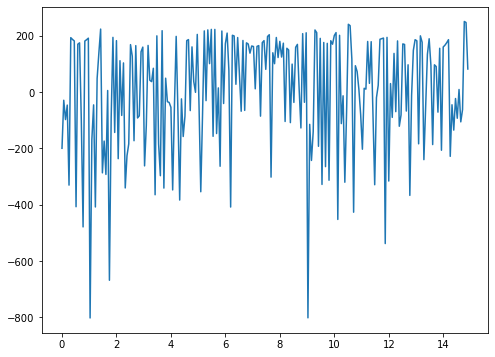

In [60]:
noise = noisy_signal - filtered_signal

plt.figure(figsize=(8, 6))
plt.plot(np.arange(len(noise)) / fs, noise)

In [61]:
import statsmodels
from statsmodels.stats.diagnostic import het_breuschpagan
# Perform Breusch-Pagan test
exog = np.arange(len(noise))/fs
# Add a constant column to 'exog'
exog_with_constant = statsmodels.api.add_constant(exog)
lm, lm_pvalue, fvalue, f_pvalue = het_breuschpagan(noise, exog_with_constant)

# Print the test results
print("Breusch-Pagan Test:")
print(f"LM Statistic: {lm}")
print(f"LM P-Value: {lm_pvalue}")
print(f"F-Statistic: {fvalue}")
print(f"F P-Value: {f_pvalue}")

# Interpret the results
alpha = 0.05
if lm_pvalue < alpha:
    print("Reject the null hypothesis: Heteroscedasticity is present.")
else:
    print("Fail to reject the null hypothesis: No evidence of heteroscedasticity.")

Breusch-Pagan Test:
LM Statistic: 3.096157810120885
LM P-Value: 0.07847730767940965
F-Statistic: 3.110984461925676
F P-Value: 0.0790935710688124
Fail to reject the null hypothesis: No evidence of heteroscedasticity.


/home/oestefal/.sage/local/lib/python3.10/site-packages/numpy/core/_asarray.py:126: ComplexWarning: Casting complex values to real discards the imaginary part
  arr = array(a, dtype=dtype, order=order, copy=False, subok=subok)


### Construindo VA do ruído

/home/oestefal/.sage/local/lib/python3.10/site-packages/numpy/lib/histograms.py:841: ComplexWarning: Casting complex values to real discards the imaginary part
  indices = f_indices.astype(np.intp)
/home/oestefal/.sage/local/lib/python3.10/site-packages/numpy/lib/histograms.py:884: ComplexWarning: Casting complex values to real discards the imaginary part
  db = np.array(np.diff(bin_edges), float)
/usr/lib/python3/dist-packages/matplotlib/transforms.py:775: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.asarray(points, float)


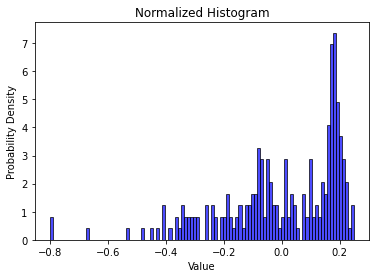

In [62]:
import numpy as np
import matplotlib.pyplot as plt

scaled_noise = noise/1000
aux.plot_normalized_histogram(scaled_noise)

Pelo teorema central do limite, a densidade da amostragem noise converge à distribuição da VA que a gera. Gerando mais dados com a densidade obtida:

232


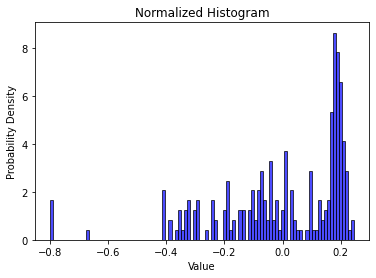

In [63]:
# Generate resamples
scaled_resampled_noise = aux.random_resample(scaled_noise, n_resamples=len(data["value"].to_list())) # <-------------------

# Plot samples
#plot_normalized_histogram(scaled_resampled_data)
print(scaled_resampled_noise.size)
aux.plot_normalized_histogram(scaled_resampled_noise)


### Simulando dados de respiração uniforme de frequência qualquer

Pra fazer isso, pegamos filtered_fft (coeficientes da decomposição discreta de Fourier) e suas respectivas frequências em filtered_frequencies. Usamos (INSIRA BIBLIOTECA AQUI) para gerar dados da curva desejada e tomamos ela como filtered_simulated_signal.

In [64]:
importlib.reload(aux)
freq_of_interest = 0.6
scale = freq_of_interest/0.3
filtered_simulated_signal_0p6Hz = aux.generate_signal(filtered_frequencies*scale, filtered_fft, len(scaled_resampled_noise), fs)
simulated_signal_0p6Hz = filtered_simulated_signal_0p6Hz + scaled_resampled_noise*1000 # <----- existe problema de escala mas deu certo

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


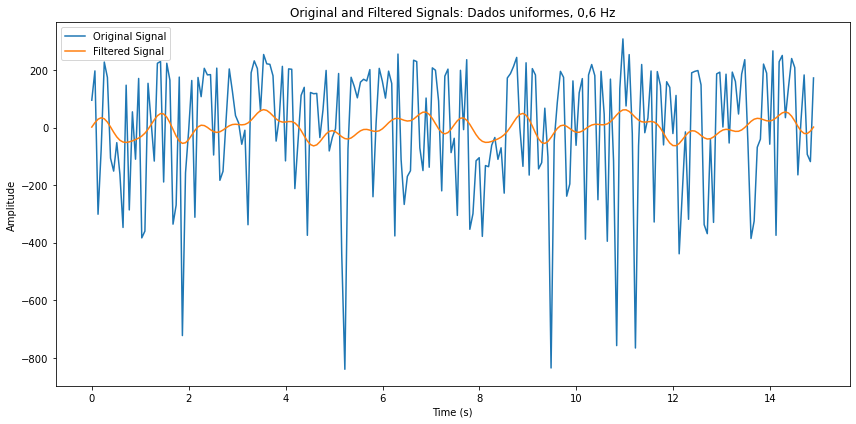

In [65]:
aux.plot_signals(simulated_signal_0p6Hz, filtered_simulated_signal_0p6Hz, fs = fs, label = "Dados uniformes, 0,6 Hz")
#aux.plot_spectral_densities(freqs, psd, filtered_frequencies, filtered_psd, fs = fs, label = "Dados uniformes, 0,6 Hz")

/usr/lib/python3/dist-packages/scipy/signal/_peak_finding.py:261: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)
/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


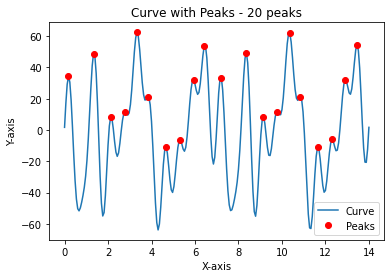

In [66]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

aux.finding_peaks(np.array(filtered_simulated_signal_0p6Hz), fs = fs)

### Simulação de ciclo de Cheyne-Strokes

Para fazer qualquer ritmo respiratorio não constante basta fazer uma transformação nao linear no calculo da inversa do FFT, como demostrado abaixo
(falta generalizar pra usar função qualquer no mesmo generate_signal)

In [11]:
result = []
n = len(noise)
freq = np.array(filtered_frequencies)
fft_coef = np.array(filtered_fft)
## t = np.arange(0, n, 1/fs)  # Time array
t = np.linspace(0, n/fs, num=n, endpoint=True, dtype=None, axis=0)
element = 0

variance = 3
mean = n/fs/2

for x in t:
    element = 0

    for j in range(len(freq)-6):
        
        f_i = 1000*np.exp(-(x - mean)**2 / (2 * variance)) / np.sqrt(2 * np.pi * variance) # <----- a trasnformação de interesse entra nesse x
        coef = 1000*np.exp(-(x - mean)**2 / (2 * 2*variance)) / np.sqrt(2 * np.pi * 2*variance)
        
        element += coef*fft_coef[j] * np.exp(1j * 2 * np.pi * freq[j] * f_i) 

    result.append(element/(len(t)))


/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


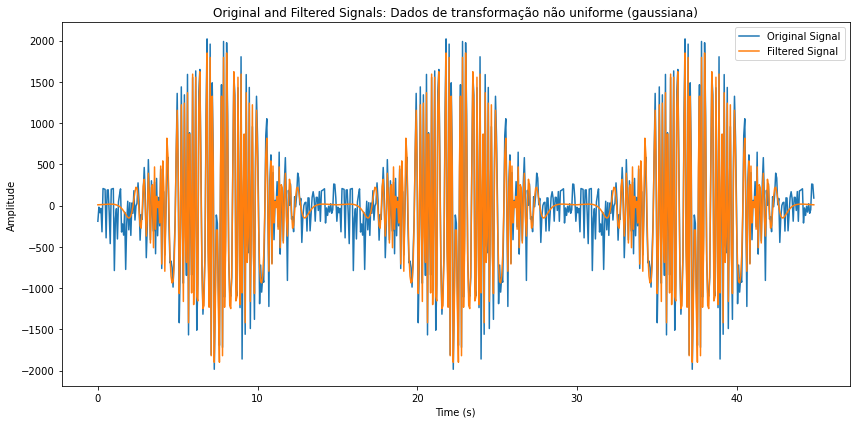

In [12]:
stokes_simulation = (result + noise).tolist() + (result + noise).tolist() + (result + noise).tolist()
stokes_mean_simulation = result + result + result
aux.plot_signals(stokes_simulation, stokes_mean_simulation, fs = fs, label = "Dados de transformação não uniforme (gaussiana)")

## Encontrando trechos de não estacionaridade em séries temporais localmente estacionárias por partes

esse vai dar um pouco de trabalho. A ideia é fazer um algoritmo recursivo que desça em arvores buscando por pontos de nao estacionaridade em series temporais, truncando os dados até um tamanho mínimo definido previamente.

Precisa:
- fazer algoritmo que recebe serie temporal e devolva trechos com informação de estacionaridade (triplas (int, int, boolean)) OK
- fazer algoritmo que recebe os trechos e tenta fazer merges para deixar o intervalos menores

In [177]:
time_series = data["value"].to_list() + simulated_signal_0p6Hz.real.tolist() + data["value"].to_list() + stokes_simulation + simulated_signal_0p6Hz.real.tolist()
time_series = np.real(time_series)

In [178]:
intervals = []
aux.recursive_binary_TEST(intervals, time_series, 0, len(time_series)-1, 0.1*fs) # modificando fs porque os dados são poucos

In [179]:
intervals

[(0, 202, True, 2.8830085772712135e-16),
 (203, 228, False, None),
 (229, 253, False, None),
 (254, 304, True, 4.8909304271039e-05),
 (305, 405, True, 2.8565162845252165e-20),
 (406, 456, True, 2.4778912637767234e-11),
 (457, 482, False, None),
 (483, 507, False, None),
 (508, 608, True, 5.368017325232045e-07),
 (609, 634, False, None),
 (635, 659, False, None),
 (660, 685, False, None),
 (686, 710, False, None),
 (711, 811, True, 7.578518900244346e-12),
 (812, 1623, True, 1.0151542164484837e-11)]

In [180]:
clean_intervals = []
aux.intervals_cleaner(clean_intervals, intervals)

In [181]:
clean_intervals

[(0, 202, True),
 (203, 253, False),
 (254, 456, True),
 (457, 507, False),
 (508, 608, True),
 (609, 710, False),
 (711, 1623, True),
 (812, 1623, True)]

IMPORTANTE!!! NADA GARANTE QUE ESSA LISTA LIMPA TENHA OS INTERVALOS MERGADOS SENDO ESTACIONÁRIOS
SERVE APENAS PARA PLOT NO MOMENTO

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


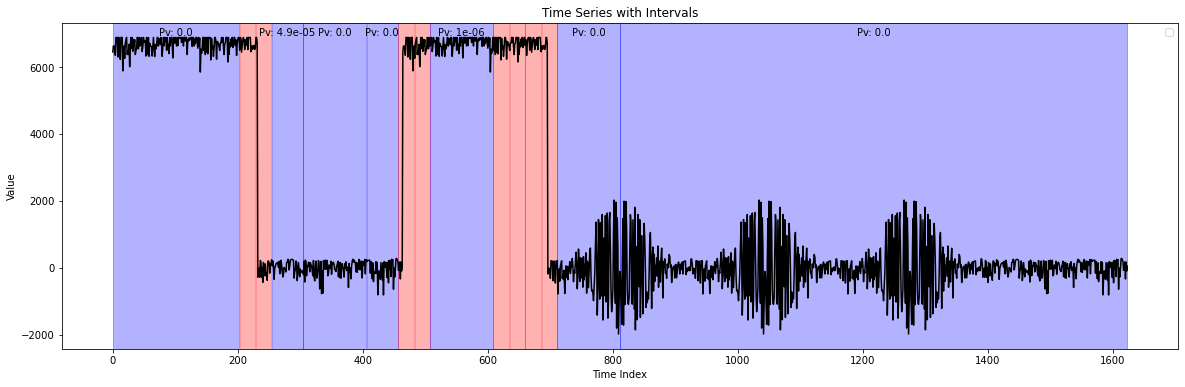

In [182]:
aux.plot_intervals(time_series, intervals, decimals = 6)

O ALGORITMO FALHOU EM RECONHECER STOKES!!!!!!!!!!!!!!!!!!!!

In [174]:
aux.adf_test(np.real(stokes_simulation), critical_value=0.05)

((-3.873719353161183,
  0.0022370006475654113,
  17,
  678,
  {'1%': -3.4400317565062455,
   '5%': -2.8658123184971576,
   '10%': -2.56904513726821},
  9257.30322572403),
 True)

## Testando estacionaridade especificamente em Stokes

In [1]:
import importlib
import aux
import matplotlib.pyplot as plt
import numpy as np
import scipy
from scipy.signal import welch, butter, filtfilt
importlib.reload(aux)

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<module 'aux' from '/home/oestefal/Desktop/paradas_almir/respiratory_data_threatment/aux.py'>

In [20]:
aux.adf_test(np.real(stokes_simulation), critical_value=0.05)

((-7.479760519535139,
  4.806912223918489e-11,
  19,
  676,
  {'1%': -3.4400605106273368,
   '5%': -2.865824986587412,
   '10%': -2.5690518865761},
  10690.856774967264),
 True)

Deu ruim e tem que dar um jeito de identificar. Pra classificar os dados precisa:
- Encontrar momentos de movimento do paciente (OK)
- Encontrar momentos de apneia

Para decidir sobre apneia porvavelmente a melhor abordagem é atacar a amplitude

## Estabelecendo metricas de eficiencia

- Gerar sinal de 5 frequencias respiratorias entre 0.1 e 0.7 e concatenar tudo
- Rodar algoritmos na serie temporal para separar em regioes estacionarias
- Para cada regiao, estimar a frequencia respiratoria
- Calcular R² e RMSE e normalizar pela quantidade de regiões (normalização só é necessaria pra quando for comparar com sinais vindos de outras series temporais)

In [54]:
import pandas as pd
data = pd.read_csv('samples.csv', header = None)
data = data.rename(columns={0: 'time_stamp', 1: 'value'})

import importlib
import aux
import matplotlib.pyplot as plt
import numpy as np
import scipy
from scipy.signal import welch, butter, filtfilt
importlib.reload(aux)

duration = (data["time_stamp"].to_list()[-1] - data["time_stamp"].to_list()[0])
fs = data.size/29.919 # Sampling frequency

f1, f2 = 10, 50  # Frequencies of the sine waves

noisy_signal = data["value"].to_list()
noisy_signal = noisy_signal - np.mean(noisy_signal)

# Define the band mask and the number of most significant frequencies to keep
band_mask = (0.1, 1)  # Keep frequencies between 5 Hz and 30 Hz
n_most_significant = 8

# Process the signal
filtered_signal, filtered_frequencies, filtered_psd, filtered_fft, new_values = aux.filter_frequencies(noisy_signal, fs, band_mask, n_most_significant)



Filtered frequencies: [0.13369431 0.20054146 0.26738862 0.33423577 0.40108292 0.46793008
 0.53477723 0.60162439 0.66847154 0.73531869 0.80216585 0.869013
 0.93586016]


/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


In [82]:
# gerando dados

signals = []
for i in np.arange(0.1, 0.7, 0.1):
    
    freq_of_interest = i
    scale = freq_of_interest/0.3
    filtered_simulated_signal = aux.generate_signal(filtered_frequencies*scale, filtered_fft, len(scaled_resampled_noise), fs)
    simulated_signal = filtered_simulated_signal + scaled_resampled_noise*1000
    signals = np.real(np.concatenate((signals, simulated_signal)))


In [85]:
filtered_signal, filtered_frequencies, filtered_psd, filtered_fft, new_values = aux.filter_frequencies(noisy_signal, fs, band_mask, n_most_significant)

Filtered frequencies: [0.13369431 0.20054146 0.26738862 0.33423577 0.40108292 0.46793008
 0.53477723 0.60162439 0.66847154 0.73531869 0.80216585 0.869013
 0.93586016]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

aux.finding_peaks(filtered_signal, fs = fs)
